In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/duerunner/UBA/ALGORITMOS/MetNum/TP3-MetNum/notebooks
Python 3.6.9


## Cargamos el dataset

In [2]:
# Carquemos el dataset 
df_train = pd.read_csv("../data/train.csv")
# Veamos el tamaño
display("Dimensiones: ", df_train.shape)
# Y sus primeras filas 
pd.set_option("display.max.columns", None)
#df_train.head(5)

'Dimensiones: '

(240000, 23)

In [3]:
df_train.dropna()
df_train.shape

(240000, 23)

## K-Fold Cross Validation
A la hora de realizar los experimentos al igual que en el tp anterior se debe usar cross-validation para evitar overfitting y obtener resultados estadisticamente mas robustos.

## Metricas
Se utilizan las funciones provistas por sklearn
###  RMSE 
- La raíz del error cuadrático medio 
###  RMSLE 
- Error logarítmico cuadrático medio

### R^2
- "is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)"
- (Solo la usamos cuando sea necesario)

In [4]:
# Importo las funciones necesarias desde otro archivo nuestro
from extra_scripts import cross_validate, rmse, rmsle

# Experimento 1: Prediccion de Precios por M^2
Nos interesa predecir los precios en base a los metros totales del inmueble. 

In [5]:
# Todos los datos son del conjunto de train ya que el de test no tiene los precios.
# Usamos un muestra de 30000 viviendas que no tengan datos faltantes, donde el 80 por ciento sera de training y el 20 de test
limite = 30000
cant_train = int((limite / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1).dropna()
new_train = shuffle.iloc[:cant_train, :]
new_test = shuffle.iloc[cant_train:limite, :]

x_train, x_test = new_train["metroscubiertos"].values, new_test["metroscubiertos"].values
y_train, y_test = new_train["precio"].values, new_test["precio"].values

In [6]:
# Veamos el dataset que nos queda
train = new_train
display(train["metroscubiertos"].describe())

count    24000.000000
mean       157.814458
std         86.285054
min         15.000000
25%         86.000000
50%        140.000000
75%        210.000000
max        439.000000
Name: metroscubiertos, dtype: float64

In [7]:
sns.set(style="whitegrid")
train.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04
mean,150584.861083,8.78075,2.870000,1.658125,2.010875,157.814458,151.176458,2.438394e+06,20.636291,-100.281796,0.070083,0.080333,0.094375,0.671750,0.638250,2.214552e+06
std,86681.950907,9.33483,0.826264,0.754886,0.861368,86.285054,80.054465,1.060289e+07,2.836521,5.488813,0.255293,0.271814,0.292356,0.469586,0.480517,1.848127e+06
min,34.000000,0.00000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-21.677988,-117.120217,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,75604.500000,1.00000,2.000000,1.000000,1.000000,86.000000,90.000000,2.468000e+04,19.358810,-101.151387,0.000000,0.000000,0.000000,0.000000,0.000000,8.700000e+05
50%,151242.000000,5.00000,3.000000,2.000000,2.000000,140.000000,130.000000,5.564900e+04,19.540569,-99.242810,0.000000,0.000000,0.000000,1.000000,1.000000,1.650000e+06
75%,225298.000000,10.00000,3.000000,2.000000,3.000000,210.000000,197.000000,8.571200e+04,20.689953,-99.139033,0.000000,0.000000,0.000000,1.000000,1.000000,2.950000e+06
max,299991.000000,80.00000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,43.491596,11.390628,1.000000,1.000000,1.000000,1.000000,1.000000,1.251600e+07


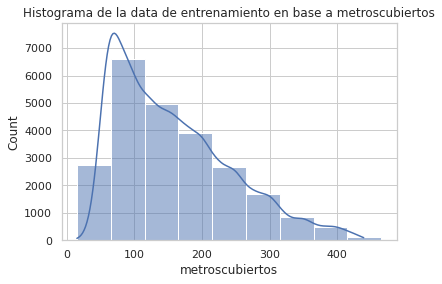

In [8]:
ax = sns.histplot(data=train, x="metroscubiertos",binwidth=50,kde=True)
ax.set_title("Histograma de la data de entrenamiento en base a metroscubiertos")
fig = ax.get_figure()
fig.savefig("Exp1/Hist1.png")

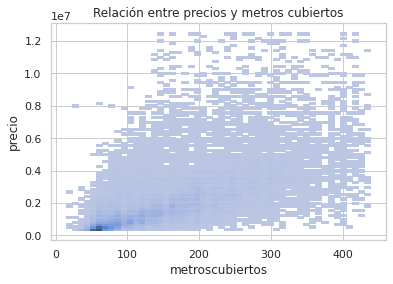

In [9]:
#Exploremos su relacion con los precios
ax = sns.histplot(train, x="metroscubiertos", y="precio")
ax.set_title("Relación entre precios y metros cubiertos")
fig = ax.get_figure()
fig.savefig("Exp1/Hist2.png")

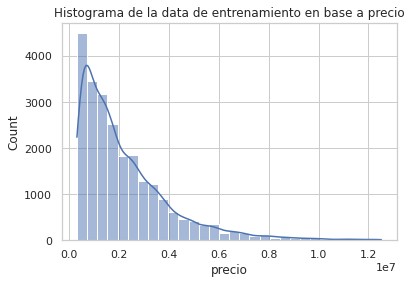

In [10]:
ax = sns.histplot(data=train, x="precio",bins=30,kde=True)
ax.set_title("Histograma de la data de entrenamiento en base a precio")
fig = ax.get_figure()
fig.savefig("Exp1/Hist3.png")

In [11]:
# Ahora queremos entrenar el modelo
modelo = metnum.LinearRegression()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

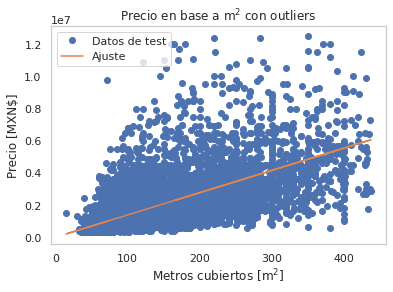

In [12]:
plt.figure("precio-metros-cubiertos")
plt.plot(x_test, y_test, "o", label="Datos de test")
plt.plot(x_test, y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.title("Precio en base a $\mathrm{m}^2$ con outliers")
plt.savefig("Exp1/Precio-en-funcion-de-m2-con-outliers.png")
plt.show()

In [13]:
# Metricas del conjunto de training
results = cross_validate(10, x_train, y_train, True)

RMSE = (1452926.1338472245, 37033.15729195025)
RMSLE = (0.5811196734643611, 0.004375662439936389)


In [14]:
# Metricas del fitting

print(f"RMSE = {rmse(y_test, y_pred)}")
print(f"RMSLE = {rmsle(y_test, y_pred)}")

RMSE = 1418452.0449444205
RMSLE = 0.5688408197372843


In [15]:
from extra_scripts import remove_outliers

#Outliers Free train set
#OF_new_train = remove_outliers(new_train, "metrostotales", 2)
#OF_new_test = remove_outliers(new_test, "metrostotales", 2)
OF_new_train = remove_outliers(new_train, "precio", 2)
OF_new_test = remove_outliers(new_test, "precio", 2)

(22793, 23)
(5696, 23)


In [16]:
OF_x_train, OF_x_test = OF_new_train["metrostotales"].values, OF_new_test["metrostotales"].values
OF_y_train, OF_y_test = OF_new_train["precio"].values, OF_new_test["precio"].values

In [17]:
OF_modelo = metnum.LinearRegression()
OF_modelo.fit(OF_x_train, OF_y_train)
OF_y_pred = modelo.predict(OF_x_test)

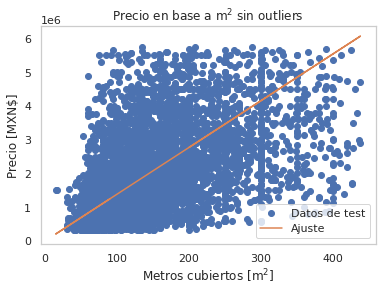

In [18]:
plt.figure("precio-metros-cubiertos")
plt.plot(OF_x_test, OF_y_test, "o", label="Datos de test")
plt.plot(OF_x_test, OF_y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.title("Precio en base a $\mathrm{m}^2$ sin outliers")
plt.savefig("Exp1/Precio-en-funcion-de-m2-sin-outliers.png")
plt.show()

In [19]:
# Metricas del conjunto de training
OF_results = cross_validate(10, OF_x_train, OF_y_train, True)

RMSE = (1141284.1873734058, 32755.910631939543)
RMSLE = (0.6043986246372196, 0.005810146832705705)


In [20]:
# Metricas del fitting

print(f"RMSE = {rmse(OF_y_test, OF_y_pred)}")
print(f"RMSLE = {rmsle(OF_y_test, OF_y_pred)}")

RMSE = 1143890.9743425506
RMSLE = 0.6148616968245326


In [21]:
#Muestro las diferencias entre los dos resultados en una tabla
WO_rmse = results["RMSE"]
WO_rmsle = results["RMSLE"]
OF_rmse = OF_results["RMSE"]
OF_rmsle = OF_results["RMSLE"]

print("With Outliers")
print(f" - RMSE = {(np.mean(WO_rmse), np.std(WO_rmse))}")
print(f" - RMSLE = {(np.mean(WO_rmsle), np.std(WO_rmsle))}")

print("No Outliers")
print(f" - RMSE = {(np.mean(OF_rmse), np.std(OF_rmse))}")
print(f" - RMSLE = {(np.mean(OF_rmsle), np.std(OF_rmsle))}")

print("Differences")
print(f" - RMSE = {(np.mean(WO_rmse) - np.mean(OF_rmse), np.std(WO_rmse) - np.std(OF_rmse))}")
print(f" - RMSLE = {(np.mean(WO_rmsle) - np.mean(OF_rmsle), np.std(WO_rmsle) - np.std(OF_rmsle))}")


With Outliers
 - RMSE = (1452926.1338472245, 37033.15729195025)
 - RMSLE = (0.5811196734643611, 0.004375662439936389)
No Outliers
 - RMSE = (1141284.1873734058, 32755.910631939543)
 - RMSLE = (0.6043986246372196, 0.005810146832705705)
Differences
 - RMSE = (311641.94647381874, 4277.246660010707)
 - RMSLE = (-0.023278951172858497, -0.001434484392769316)
